In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inlineObservation: Our accuracy score improve from 0.89 to 0.89.47

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [4]:
bankdata=pd.read_csv('bank-full.csv', sep = ';', header = 0)

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Finding out the missing values
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*Statistical Overview*

In [7]:
bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Data Exploration**

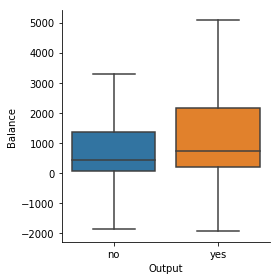

In [8]:
sns.factorplot(x='y',y='balance',
               data=bankdata,kind='box', showfliers = False)
plt.xlabel("Output")
plt.ylabel("Balance")
plt.show();

In [9]:
def convert_output(output):
    if output == 'no':
        output=0
    else:
        output=1
    return output
      
bankdata['output'] = bankdata['y'].apply(convert_output)

In [10]:
def convert_pday(pday):
    if pday <0:
        pday=0
    return pday
      
bankdata['pdays'] = bankdata['pdays'].apply(convert_pday)

<Figure size 720x360 with 0 Axes>

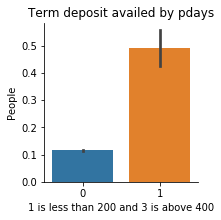

In [11]:
def convert_day(pday):
    if pday >400:
        pday=1
    else:
        pday=0
    return pday
      
bankdata['pdays_cat'] = bankdata['pdays'].apply(convert_day)


plt.figure(figsize=(10,5))
mx = sns.factorplot(x="pdays_cat", y="output", data=bankdata, kind="bar", size=3)
mx.set(ylabel='People')
plt.title('Term deposit availed by pdays');
plt.xlabel('1 is less than 200 and 3 is above 400')
plt.show();

<Figure size 720x360 with 0 Axes>

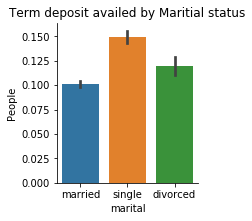

In [12]:
plt.figure(figsize=(10,5))
mx = sns.factorplot(x="marital", y="output", data=bankdata, kind="bar", size=3)
mx.set(ylabel='People')
plt.title('Term deposit availed by Maritial status');
plt.show();

<Figure size 720x216 with 0 Axes>

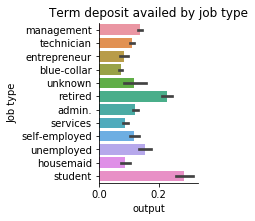

In [13]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(y="job",x="output", data=bankdata, kind="bar", size=3)
mx.set(ylabel='Job type')
plt.title('Term deposit availed by job type');
plt.show();

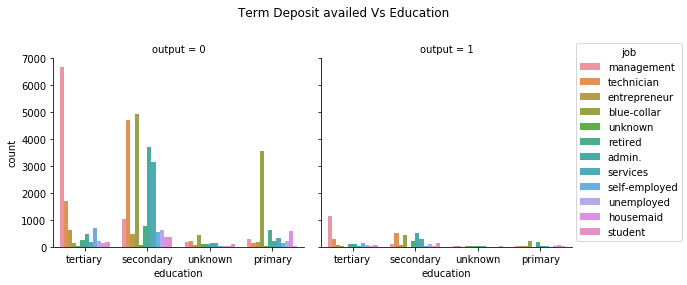

In [14]:
sns.factorplot('education', data=bankdata, kind='count', hue="job",col="output")
plt.subplots_adjust(top=.8)
plt.suptitle('Term Deposit availed Vs Education')
plt.show();

<Figure size 720x216 with 0 Axes>

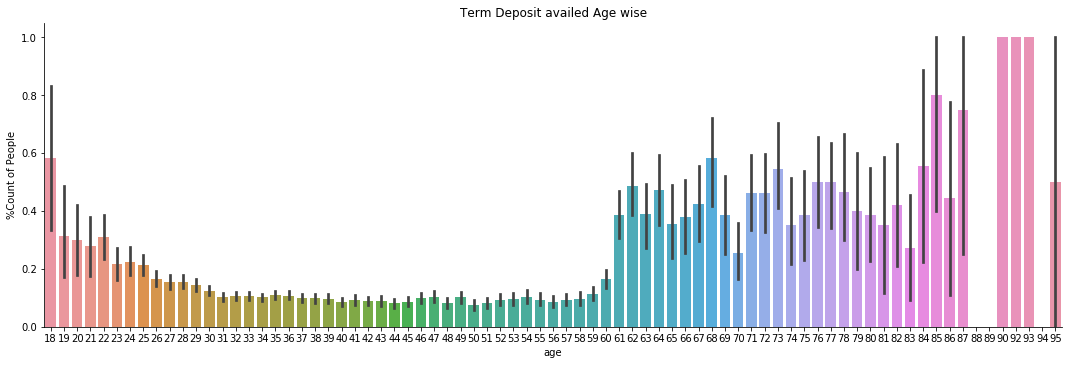

In [15]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="age",y="output", data=bankdata, kind="bar", size=5,aspect=3)
mx.set(ylabel='%Count of People')
plt.title('Term Deposit availed Age wise');
plt.show();

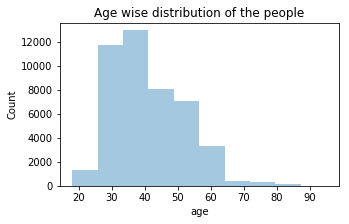

In [16]:
plt.figure(figsize=(5,3))
sns.distplot(bankdata['age'], bins=10, kde=False)
plt.ylabel('Count')
plt.title('Age wise distribution of the people')
plt.show();

<Figure size 720x360 with 0 Axes>

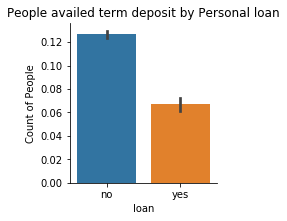

In [17]:
plt.figure(figsize=(10,5))
mx = sns.factorplot(x="loan", y="output", data=bankdata, kind="bar", size=3)
mx.set(ylabel='Count of People')
plt.title('People availed term deposit by Personal loan');
plt.show();

<Figure size 720x216 with 0 Axes>

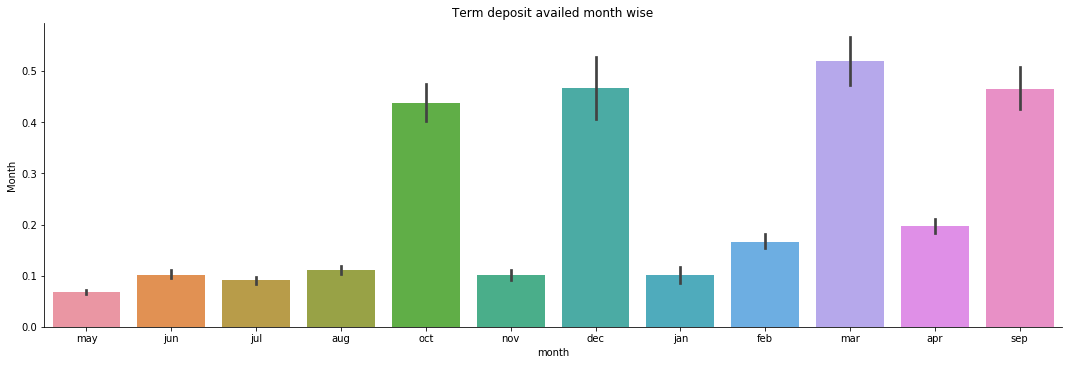

In [18]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="month",y="output", data=bankdata, kind="bar", size=5,aspect=3)
mx.set(ylabel='Month')
plt.title('Term deposit availed month wise');
plt.show();

<Figure size 720x216 with 0 Axes>

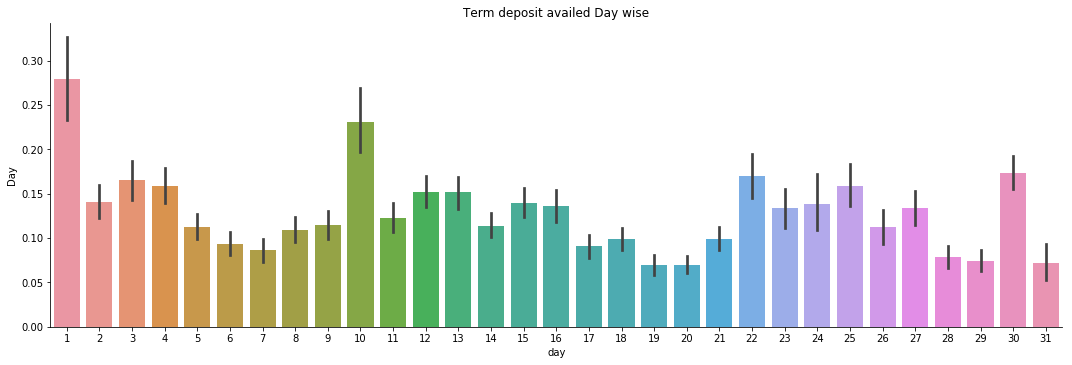

In [19]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="day",y="output", data=bankdata, kind="bar", size=5,aspect=3)
mx.set(ylabel='Day')
plt.title('Term deposit availed Day wise');
plt.show();

<Figure size 360x144 with 0 Axes>

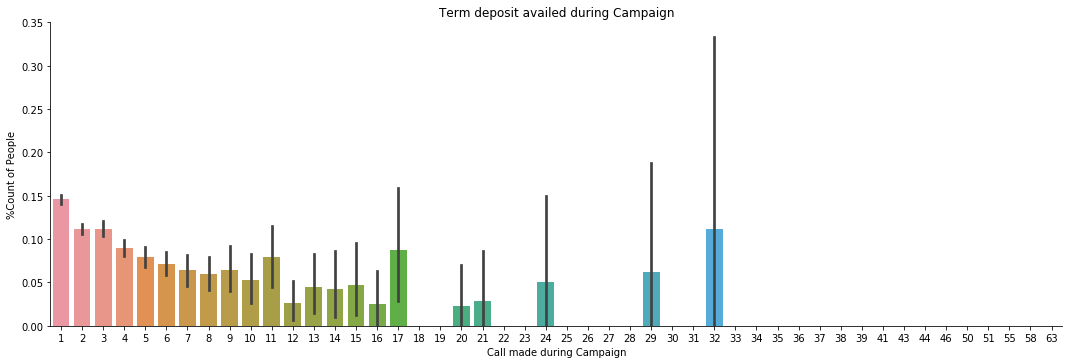

In [20]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="campaign", y="output", data=bankdata, kind="bar", size=5 ,aspect=3)
mx.set(xlabel='Call made during Campaign')
mx.set(ylabel='%Count of People')
plt.title('Term deposit availed during Campaign');
plt.show();

<Figure size 360x144 with 0 Axes>

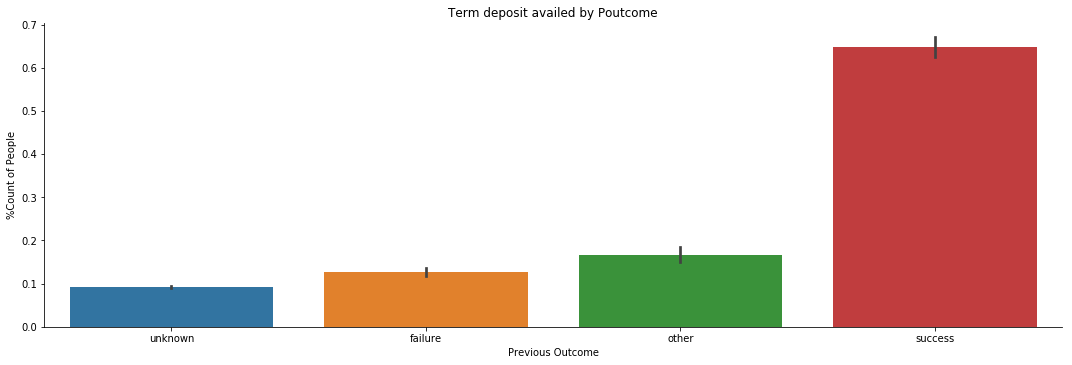

In [21]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="poutcome", y="output", data=bankdata, kind="bar", size=5 ,aspect=3)
mx.set(xlabel='Previous Outcome')
mx.set(ylabel='%Count of People')
plt.title('Term deposit availed by Poutcome');
plt.show();

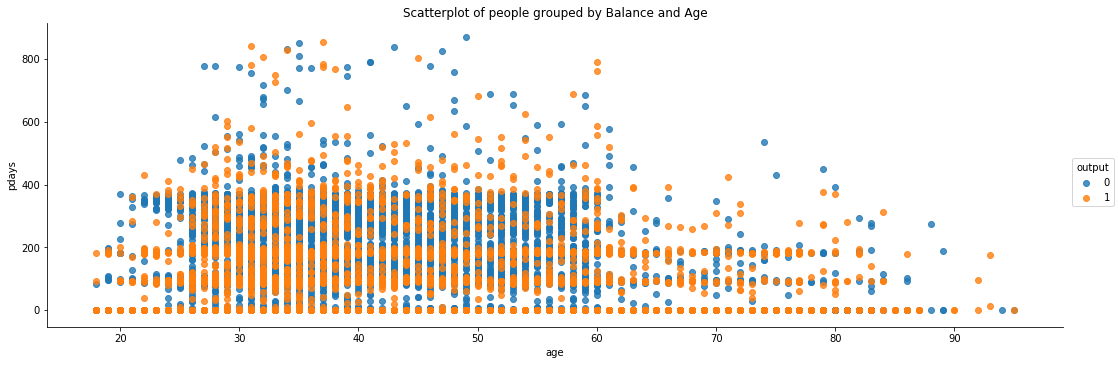

In [22]:
sns.lmplot('age', 'pdays', data=bankdata, fit_reg=False, hue="output",size=5,aspect=3)
plt.title('Scatterplot of people grouped by Balance and Age')
plt.show();

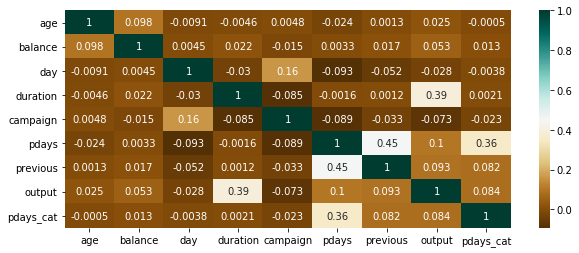

In [23]:
corr =bankdata.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,cmap="BrBG",annot = True)
plt.show();

**FEATURE ENGINEERING**

In [24]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,output,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,0,0


In [25]:
#Dropping the columns which are not required
bankdata.drop('duration',inplace= True,axis=1)
from sklearn.preprocessing import LabelEncoder
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,output,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,0,unknown,no,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,0,unknown,no,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,0,unknown,no,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,0,unknown,no,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,0,unknown,no,0,0


In [26]:
# Creating a function for age group below 30 and above 59 as a categorical feature
def age_output(age):
    if age <31:
        age=1
    elif age>59:
        age=3
    else:
        age=2
    return age
      
bankdata['is_sing_ret'] = bankdata['age'].apply(age_output)

In [27]:
# Creating a function for previous contact made as a categorical feature
def prev_output(prev):
    if prev <11 :
        prev=1
    else:
        prev=0
    return prev
      
bankdata['is_prev10'] = bankdata['previous'].apply(prev_output)

In [28]:
# Creating a function for first 3 campaign call as a categorical feature
def camp_output(camp):
    if camp <25 :
        camp=1
    else:
        camp=0
    return camp
      
bankdata['is_camp25'] = bankdata['campaign'].apply(camp_output)

In [29]:
# First 10 days of call as a categorical feature
def day_output(day):
    if day <11 :
        day=1
    else:
        day=0
    return day
      
bankdata['is_day10'] = bankdata['day'].apply(day_output)

In [30]:
# Converting Categorical to Numerical for default column
job_dummies = pd.get_dummies(bankdata.job, prefix='job')
marital_dummies = pd.get_dummies(bankdata.marital, prefix='marital')
credit_dummies = pd.get_dummies(bankdata.default, prefix='crddefault')
housing_dummies = pd.get_dummies(bankdata.housing, prefix='housloan')
personel_dummies= pd.get_dummies(bankdata.loan, prefix='perloan')
month_dummies=pd.get_dummies(bankdata.month, prefix='month')
education_dummies=pd.get_dummies(bankdata.education, prefix='education')
contact_dummies=pd.get_dummies(bankdata.contact, prefix='contact')
poutcome_dummies=pd.get_dummies(bankdata.poutcome, prefix='poutcome')
age_dummies = pd.get_dummies(bankdata.is_sing_ret, prefix='age_')
pdays_dummies = pd.get_dummies(bankdata.pdays_cat, prefix='pdays_')

In [31]:
bankdata = pd.concat([bankdata,job_dummies], axis=1)
bankdata = pd.concat([bankdata,marital_dummies], axis=1)
bankdata = pd.concat([bankdata,credit_dummies], axis=1)
bankdata = pd.concat([bankdata,housing_dummies], axis=1)
bankdata = pd.concat([bankdata,personel_dummies], axis=1)
bankdata = pd.concat([bankdata,month_dummies], axis=1)
bankdata = pd.concat([bankdata,education_dummies], axis=1)
bankdata = pd.concat([bankdata,contact_dummies], axis=1)
bankdata = pd.concat([bankdata,poutcome_dummies], axis=1)
bankdata = pd.concat([bankdata,age_dummies], axis=1)
bankdata = pd.concat([bankdata,pdays_dummies], axis=1)

In [32]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age__1,age__2,age__3,pdays__0,pdays__1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,1,0,1,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0


In [33]:
DF = bankdata.drop(['is_sing_ret','job_unknown','poutcome_unknown','contact_unknown','campaign','month_jan','month_feb','month_may','month_jul','month_nov','month_jan','age','day','education','contact','job','pdays','previous','poutcome','balance','marital','default','housing','loan','month','y'],axis=1)
DF.head()

,output,pdays_cat,is_prev10,is_camp25,is_day10,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,age__1,age__2,age__3,pdays__0,pdays__1
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [34]:
#splitting the features and labels

X = DF.drop('output',axis = 1)
y = DF['output']

**Building the model using LOGISTIC REGRESSION**

In [60]:
#Splitting the data into train and test

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l2',solver='liblinear',C=1e42) #Set Large C value for low regularization to prevent overfitting

In [37]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Finding key predictors for Term co-eff
coeff=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coeff.columns=("Variables","Co-eff")
coeff.sort_values("Co-eff",ascending = False)

,Variables,Co-eff
39,poutcome_success,2.207868
28,month_mar,1.613670
2,is_camp25,1.385499
29,month_oct,1.260665
35,contact_cellular,1.243738
26,month_dec,1.177529
30,month_sep,1.152321
36,contact_telephone,0.948772
24,month_apr,0.735807
27,month_jun,0.673194


In [39]:
#Applying the model on test and train data
y_pred_test = logreg.predict(x_test)

In [40]:
# Comparing the metrics of predicted and real level of test data
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Accuracy:  0.8913299911530522


In [41]:
#Creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [42]:
y_train.value_counts()

# Visualizing the output of Logistic Regression based on the X inputs and y_pred
logreg.predict_proba(X)

array([[0.97497725, 0.02502275],
       [0.97318437, 0.02681563],
       [0.98721223, 0.01278777],
       ...,
       [0.25895086, 0.74104914],
       [0.91901216, 0.08098784],
       [0.89649948, 0.10350052]])

In [43]:
y_test.value_counts()

0    11966
1     1598
Name: output, dtype: int64

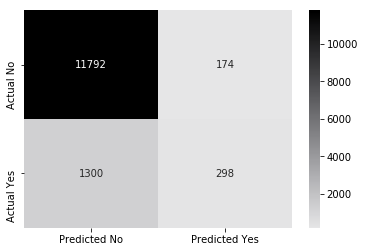

In [44]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')
plt.show();

In [45]:
#Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

             precision    recall  f1-score   support

          0       0.90      0.99      0.94     11966
          1       0.63      0.19      0.29      1598

avg / total       0.87      0.89      0.86     13564



**Building the model using RANDOM FOREST**

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)

In [47]:
# Fitting the model on Train Data
this_forest = forest.fit(x_train, y_train)

In [48]:
# Printing the accuracy score

print(this_forest.score(x_train, y_train))

0.8998009289980093


In [49]:
pred = this_forest.predict(x_test)

**Evaluating the Model**

In [50]:
df_confusion_rf = metrics.confusion_matrix(y_test, pred)
df_confusion_rf

array([[11846,   120],
       [ 1333,   265]], dtype=int64)

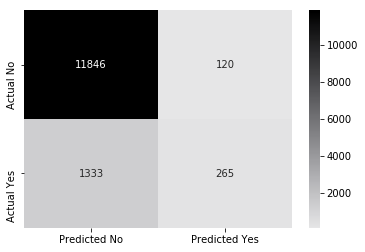

In [51]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')
plt.show();

In [52]:
#Classification Report
cr = metrics.classification_report(y_test, pred)
print(cr)

             precision    recall  f1-score   support

          0       0.90      0.99      0.94     11966
          1       0.69      0.17      0.27      1598

avg / total       0.87      0.89      0.86     13564



**Randomized Search**

In [83]:
# Different test parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [84]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [85]:
# Importing RandomizedSearchCV

from sklearn.grid_search import RandomizedSearchCV

In [87]:
forest_two = RandomForestClassifier()

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [88]:
rf_random.fit(xd_train,yd_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True -  15.7s
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True -  16.1s
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True -  20.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True -  16.6s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True -  16.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_lea

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False -  19.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False -  20.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False -  19.8s
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False -  17.3s
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, mi

[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True -  26.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False -  36.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False -  36.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False -  35.8s
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=2, min_

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False -  20.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False -  20.2s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True -  19.1s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True -  19.1s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_sampl

[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  16.2s
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  16.1s
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  16.7s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False -  29.0s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, mi

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True -  27.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True -  22.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True -  22.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True -  22.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samp

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  30.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  29.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False -  20.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False -  19.9s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_sam

[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True -  17.1s
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True -  17.0s
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True -  17.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False -  23.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=1

[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True -  13.6s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False -  18.5s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False -  18.5s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False -  18.6s
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 115.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring=None, verbose=2)

In [89]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [90]:
# Building the Random Forest model after fine tuning 

from sklearn.ensemble import RandomForestClassifier

forest_two = RandomForestClassifier(min_samples_split=10,min_samples_leaf=4,max_features='sqrt',class_weight="balanced",max_depth = 100, n_estimators = 300, random_state = 1,bootstrap= True)
forest_two

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=100, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [91]:
# Fitting the model on Train Data

this_forest_two = forest_two.fit(xd_train, yd_train)

In [92]:
print(this_forest_two.score(xd_train, yd_train))

0.8239643568110722


**Predictions from Random Forest Model**

**Observation**: The original Random forest algorithm gave 0.89 accuracy whereas after Randomized Grid Search we have only got 0.82. This is the best random combination of parameters the algorithm has choosen which produced the highest accuracy.

**Predictions from Random Forest Model after fine tuning of Hyperparameters**

In [93]:
yrf_pred = this_forest_two.predict(xd_test)

**Evaluating the Random Forest Model after fine tuning of Hyperparameters**

In [95]:
DF_confusion_rf = metrics.confusion_matrix(yd_test,yrf_pred)
DF_confusion_rf

array([[10010,  1956],
       [  665,   933]], dtype=int64)

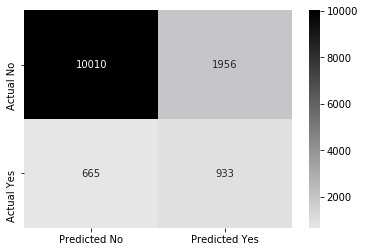

In [97]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(DF_confusion_rf, cmap = cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')
plt.show();

In [98]:
cr = metrics.classification_report(yd_test, yrf_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.84      0.88     11966
          1       0.32      0.58      0.42      1598

avg / total       0.87      0.81      0.83     13564



**Building the model using Decision Tree**

In [53]:
from sklearn import tree
this_tree_one = tree.DecisionTreeClassifier(class_weight="balanced",criterion="entropy", max_depth=3, random_state=42)
this_tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

The hyperparameters of Decision Tree model

**Training the Model**

In [54]:
Xd = DF.drop('output',axis = 1)
yd = DF['output']

from sklearn.cross_validation import train_test_split
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.30, random_state=42)

In [55]:
#Fitting the decision tree model on features and label

this_tree_one = this_tree_one.fit(xd_train, yd_train)

In [56]:
#The feature_importances_ attribute makes it simple to interpret the significance of the predictors

list(zip(Xd.columns,this_tree_one.feature_importances_))

[('pdays_cat', 0.0),
 ('is_prev10', 0.0),
 ('is_camp25', 0.0),
 ('is_day10', 0.0),
 ('job_admin.', 0.0),
 ('job_blue-collar', 0.0),
 ('job_entrepreneur', 0.0019463878371225132),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self-employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.0),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0005922687600584745),
 ('marital_divorced', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('crddefault_no', 0.0),
 ('crddefault_yes', 0.0),
 ('housloan_no', 0.003719785894236718),
 ('housloan_yes', 0.0),
 ('perloan_no', 0.0),
 ('perloan_yes', 0.0),
 ('month_apr', 0.0),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.0),
 ('month_oct', 0.0),
 ('month_sep', 0.0),
 ('education_primary', 0.0),
 ('education_secondary', 0.0),
 ('education_tertiary', 0.0),
 ('education_unknown', 0.0),
 ('contact_cellular', 0.2215318656754989),
 ('contact_telephone', 0.09438669039295491),
 ('pout

In [57]:
#Accuracy 

print(this_tree_one.score(xd_train, yd_train))

0.7744493948873511


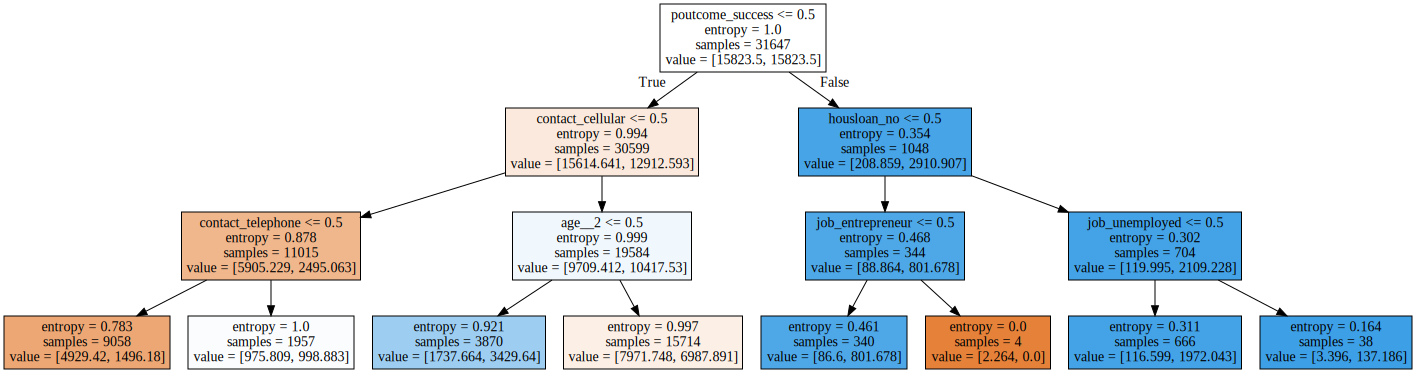

In [61]:
# Decision Tree Visualization

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(this_tree_one, out_file=dotfile, feature_names=Xd.columns, filled=True)
    dotfile.close()
    
from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [62]:
xd_test.head(10)

,pdays_cat,is_prev10,is_camp25,is_day10,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,age__1,age__2,age__3,pdays__0,pdays__1
3776,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9928,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
33409,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
31885,0,1,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
15738,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
30813,0,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
35463,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
31382,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
16904,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
11930,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [63]:
# Predictions from Decision Tree Model

yd_pred = this_tree_one.predict(xd_test)

**Evaluating the model**

In [64]:
#Confusion matrix
from sklearn import metrics

DF_confusion = metrics.confusion_matrix(yd_test, yd_pred)
DF_confusion

array([[9748, 2218],
       [ 901,  697]], dtype=int64)

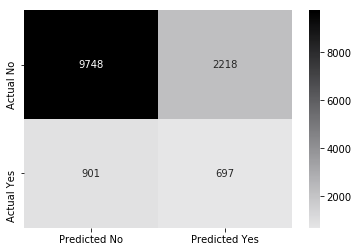

In [66]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(DF_confusion,cmap = cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')
plt.show();

In [67]:
#Classification Report for DTree

cr = metrics.classification_report(yd_test, yd_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.92      0.81      0.86     11966
          1       0.24      0.44      0.31      1598

avg / total       0.84      0.77      0.80     13564



**Fine tuning Hyper parameters <a id = 'appendix'>**

**Grid Search**

Grid-search is the process of scanning the data to configure optimal parameters for a given model. 
Let's apply Grid Search on a Decision Tree Model. It has many parameters like tree depth, criterion etc. Building different model with different combination of these parameters and finding the best fit.

In [68]:
# Test Parameters

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [69]:
from sklearn.grid_search import GridSearchCV

In [70]:
# Building the model again

this_tree_three = tree.DecisionTreeClassifier()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = this_tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

In [71]:
grid.fit(xd_train,yd_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [72]:
grid.best_score_

0.8908585331942996

In [73]:
# Best parameters for the model

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [75]:
# Using best parameters to build the model

this_tree_three = tree.DecisionTreeClassifier(class_weight="balanced",criterion= 'entropy', max_depth= 10, random_state=42)

In [76]:
this_tree_three.fit(xd_train,yd_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [77]:
#Accuracy with new model

this_tree_three.score(xd_train,yd_train)

0.8349922583499226

**Observation**: Accuracy improved from 0.89 to 0.89.47

In [78]:
yd_pred = this_tree_three.predict(xd_test)

**Model Evaluation after fine tuning**

In [79]:
from sklearn import metrics

DF_confusion = metrics.confusion_matrix(yd_test, yd_pred)
DF_confusion

array([[10343,  1623],
       [  806,   792]], dtype=int64)

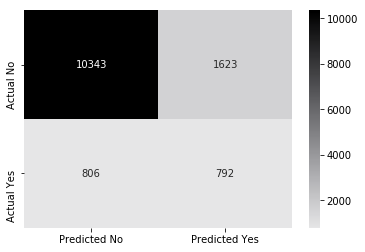

In [81]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(DF_confusion,cmap = cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')
plt.show();

In [82]:
#Classification Report for DT after fine tuning hyper parameters

cr = metrics.classification_report(yd_test, yd_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.93      0.86      0.89     11966
          1       0.33      0.50      0.39      1598

avg / total       0.86      0.82      0.84     13564

